# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [35]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
tips = sns.load_dataset('tips')


In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + total_bill', data=tips, return_type='dataframe')

In [7]:
reg = sm.OLS(y, X).fit()


In [8]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Tue, 23 May 2023   Prob (F-statistic):           6.65e-31
Time:                        21:15:01   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7961      0.224      3.561      0.000       0.356       1.237
sex[T.Female]      0.0290      0.141      0.206      0.837      -0.249       0.307
smoker[T.No]       0.1494      0.136      1.100      0.273      -0.118       0.417
time[T.Dinner]     0.0056      0.152      0.037      0.971      -0.293       0.304
total_bill         0.1059      0.008     13.954      0.000       0.091       0.121
==============================================================================
Omnibus:                       23.967   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.821
Skew:                           0.528   Prob(JB):                     1.85e-10
Kurtosis:                       4.815   Cond. No.                         83.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='total_bill'>

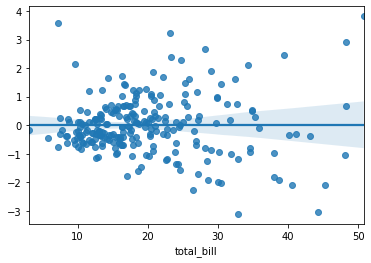

In [11]:
sns.regplot(y = residuos, x = 'total_bill', data = tips)

In [12]:
tips['log_net_bill'] = np.log(tips['total_bill'])
tips['net_bill_squared'] = tips['total_bill']**2

In [13]:
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips, return_type='dataframe')
reg_log = sm.OLS(y_log, X_log).fit()


In [14]:
y_squared, X_squared = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_squared', data=tips, return_type='dataframe')
reg_squared = sm.OLS(y_squared, X_squared).fit()


In [15]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     44.93
Date:                Tue, 23 May 2023   Prob (F-statistic):           4.12e-28
Time:                        21:19:42   Log-Likelihood:                -356.54
No. Observations:                 244   AIC:                             723.1
Df Residuals:                     239   BIC:                             740.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0644      0.482     -6.355      0.000      -4.014      -2.115
sex[T.Female]      0.0364      0.145      0.251      0.802      -0.249       0.322
smoker[T.No]       0.0853      0.139      0.612      0.541      -0.189       0.360
time[T.Dinner]     0.0093      0.156      0.060      0.953      -0.298       0.317
log_net_bill       2.0725      0.158     13.106      0.000       1.761       2.384
==============================================================================
Omnibus:                       55.034   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.746
Skew:                           0.985   Prob(JB):                     1.12e-33
Kurtosis:                       6.324   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
reg_squared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     45.56
Date:                Tue, 23 May 2023   Prob (F-statistic):           2.03e-28
Time:                        21:19:55   Log-Likelihood:                -355.80
No. Observations:                 244   AIC:                             721.6
Df Residuals:                     239   BIC:                             739.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9062      0.187     10.173      0.000       1.537       2.275
sex[T.Female]        0.0070      0.144      0.048      0.961      -0.277       0.291
smoker[T.No]         0.1675      0.139      1.203      0.230      -0.107       0.442
time[T.Dinner]       0.0613      0.155      0.396      0.693      -0.244       0.366
net_bill_squared     0.0020      0.000     13.200      0.000       0.002       0.002
==============================================================================
Omnibus:                       12.318   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.122
Skew:                           0.381   Prob(JB):                     0.000316
Kurtosis:                       4.002   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O melhor modelo é o primeiro.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [18]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + total_bill', data=tips, return_type='dataframe')


In [19]:
reg = sm.OLS(y, X).fit()

In [20]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     44.55
Date:                Tue, 23 May 2023   Prob (F-statistic):           6.38e-28
Time:                        21:28:20   Log-Likelihood:                -75.298
No. Observations:                 244   AIC:                             160.6
Df Residuals:                     239   BIC:                             178.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3290      0.073      4.535      0.000       0.186       0.472
sex[T.Female]      0.0146      0.046      0.318      0.751      -0.076       0.105
smoker[T.No]       0.0462      0.044      1.048      0.296      -0.041       0.133
time[T.Dinner]     0.0033      0.049      0.067      0.947      -0.094       0.100
total_bill         0.0322      0.002     13.079      0.000       0.027       0.037
==============================================================================
Omnibus:                        6.847   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.416
Skew:                          -0.284   Prob(JB):                       0.0245
Kurtosis:                       3.637   Cond. No.                         83.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
residuos = reg.resid

<AxesSubplot:xlabel='total_bill'>

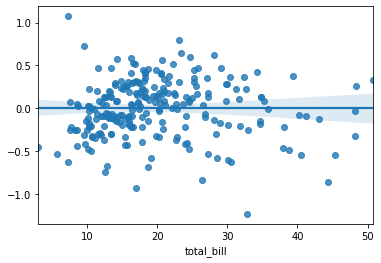

In [22]:
sns.regplot(y = residuos, x = 'total_bill', data = tips)

In [24]:
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + log_net_bill', data=tips, return_type='dataframe')
modelo_log = sm.OLS(y_log, X_log).fit()

In [25]:
y_squared, X_squared = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill_squared', data=tips, return_type='dataframe')
modelo_squared = sm.OLS(y_squared, X_squared).fit()

In [26]:
modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     51.62
Date:                Tue, 23 May 2023   Prob (F-statistic):           2.73e-31
Time:                        21:31:58   Log-Likelihood:                -67.297
No. Observations:                 244   AIC:                             144.6
Df Residuals:                     239   BIC:                             162.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9906      0.147     -6.722      0.000      -1.281      -0.700
sex[T.Female]      0.0224      0.044      0.506      0.613      -0.065       0.110
smoker[T.No]       0.0288      0.043      0.676      0.499      -0.055       0.113
time[T.Dinner]    -0.0035      0.048     -0.074      0.941      -0.097       0.090
log_net_bill       0.6816      0.048     14.102      0.000       0.586       0.777
==============================================================================
Omnibus:                       12.493   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.589
Skew:                          -0.211   Prob(JB):                     4.58e-06
Kurtosis:                       4.497   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
modelo_squared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     32.58
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.11e-21
Time:                        21:32:14   Log-Likelihood:                -90.162
No. Observations:                 244   AIC:                             190.3
Df Residuals:                     239   BIC:                             207.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6852      0.063     10.863      0.000       0.561       0.809
sex[T.Female]        0.0038      0.049      0.079      0.937      -0.092       0.100
smoker[T.No]         0.0484      0.047      1.031      0.304      -0.044       0.141
time[T.Dinner]       0.0257      0.052      0.493      0.622      -0.077       0.128
net_bill_squared     0.0006   5.11e-05     11.137      0.000       0.000       0.001
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.125
Skew:                          -0.277   Prob(JB):                        0.210
Kurtosis:                       3.036   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O melhor modelo é o modelo com o log.

In [28]:
y_tip = np.exp(y)
modelo_final = sm.OLS(y_tip, X).fit()
r_squared_final = modelo_final.rsquared

In [29]:
r_squared_final

0.45943623487583773

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [32]:
df = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')

In [36]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()

In [37]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        21:55:24   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
residuos = reg.resid

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [49]:
residuos.size

12466

In [50]:
df_change = df[0:12466]

<AxesSubplot:xlabel='tempo_emprego'>

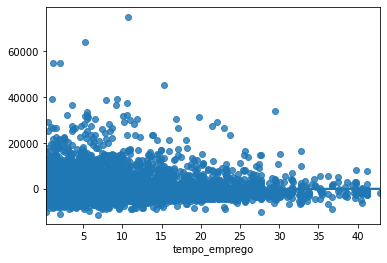

In [51]:
sns.regplot(y = residuos, x = 'tempo_emprego', data = df_change)

In [52]:
df['log_renda'] = np.log(df['renda'])
df['renda_squared'] = df['renda']**2

In [54]:
df['log_te'] = np.log(df['tempo_emprego'])
df['te_squared'] = df['tempo_emprego']**2

In [55]:
reg1 = smf.ols('log_renda ~ tempo_emprego', data = df).fit()
reg2 = smf.ols('renda_squared ~ tempo_emprego', data = df).fit()
reg3 = smf.ols('renda ~ log_te', data = df).fit()
reg4 = smf.ols('renda ~ te_squared', data = df).fit()
reg5 = smf.ols('log_renda ~ log_te', data = df).fit()
reg6 = smf.ols('renda_squared ~ te_squared', data = df).fit()


In [56]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        22:15:13   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002      0.000       7.788       7.827
tempo_emprego     0.0449      0.001     45.802      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.050
Skew:                           0.034   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          renda_squared   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1081.
Date:                Tue, 23 May 2023   Prob (F-statistic):          1.72e-227
Time:                        22:15:23   Log-Likelihood:            -2.5317e+05
No. Observations:               12466   AIC:                         5.064e+05
Df Residuals:                   12464   BIC:                         5.064e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.575e+06   2.18e+06     -3.022      0.003   -1.08e+07   -2.31e+06
tempo_emprego  6.947e+06   2.11e+05     32.883      0.000    6.53e+06    7.36e+06
==============================================================================
Omnibus:                    26260.657   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        192379719.468
Skew:                          18.028   Prob(JB):                         0.00
Kurtosis:                     610.517   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 23 May 2023   Prob (F-statistic):          7.66e-236
Time:                        22:15:34   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2612.1692     78.783     33.156      0.000    2457.742    2766.597
log_te      1372.2043     40.946     33.513      0.000    1291.945    1452.464
==============================================================================
Omnibus:                    10410.764   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437896.454
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      31.033   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        22:15:43   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3789.9264     45.197     83.854      0.000    3701.334    3878.519
te_squared     9.9976      0.201     49.780      0.000       9.604      10.391
==============================================================================
Omnibus:                     9652.373   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333382.424
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      27.391   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Tue, 23 May 2023   Prob (F-statistic):          2.85e-289
Time:                        22:15:52   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7492      0.013    603.989      0.000       7.724       7.774
log_te         0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          renda_squared   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1454.
Date:                Tue, 23 May 2023   Prob (F-statistic):          4.50e-301
Time:                        22:16:02   Log-Likelihood:            -2.5300e+05
No. Observations:               12466   AIC:                         5.060e+05
Df Residuals:                   12464   BIC:                         5.060e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.848e+07    1.6e+06     11.536      0.000    1.53e+07    2.16e+07
te_squared  2.715e+05   7119.073     38.135      0.000    2.58e+05    2.85e+05
==============================================================================
Omnibus:                    25982.037   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177342622.315
Skew:                          17.598   Prob(JB):                         0.00
Kurtosis:                     586.256   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'log_renda', 'renda_squared',
       'log_te', 'renda_te', 'te_squared'],
      dtype='object')

In [63]:
y, X = patsy.dmatrices('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df, return_type='dataframe')

In [64]:
modelo = sm.OLS(y, X).fit()

In [65]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        22:21:56   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

In [66]:
y, X = patsy.dmatrices('renda ~ posse_de_veiculo + qtd_filhos + tipo_renda + educacao + estado_civil + qt_pessoas_residencia', data=df, return_type='dataframe')

In [67]:
modelo2 = sm.OLS(y, X).fit()

In [68]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     24.78
Date:                Tue, 23 May 2023   Prob (F-statistic):           5.14e-69
Time:                        22:26:47   Log-Likelihood:            -1.4770e+05
No. Observations:               15000   AIC:                         2.954e+05
Df Residuals:                   14984   BIC:                         2.956e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3477.2697   1586.200      2.192      0.028     368.125    6586.415
posse_de_veiculo[T.True]          404.8363     78.960      5.127      0.000     250.066     559.607
tipo_renda[T.Bolsista]           -252.6214   2289.124     -0.110      0.912   -4739.584    4234.341
tipo_renda[T.Empresário]          626.9445     95.322      6.577      0.000     440.101     813.788
tipo_renda[T.Pensionista]        -958.1955    110.407     -8.679      0.000   -1174.606    -741.785
tipo_renda[T.Servidor público]   1066.3859    136.957      7.786      0.000     797.934    1334.838
educacao[T.Pós graduação]        1947.0017   1101.945      1.767      0.077    -212.945    4106.948
educacao[T.Secundário]            582.5112    334.460      1.742      0.082     -73.072    1238.095
educacao[T.Superior completo]     979.1395    337.967      2.897      0.004     316.683    1641.596
educacao[T.Superior incompleto]    96.5781    381.661      0.253      0.800    -651.525     844.681
estado_civil[T.Separado]          -20.3355    792.500     -0.026      0.980   -1573.732    1533.061
estado_civil[T.Solteiro]          -22.3374    777.367     -0.029      0.977   -1546.073    1501.398
estado_civil[T.União]            -415.2724    141.711     -2.930      0.003    -693.043    -137.502
estado_civil[T.Viúvo]            -232.8264    797.925     -0.292      0.770   -1796.857    1331.205
qtd_filhos                       -335.8374    776.568     -0.432      0.665   -1858.006    1186.331
qt_pessoas_residencia             188.1374    775.222      0.243      0.808   -1331.394    1707.668
==============================================================================
Omnibus:                    12893.405   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           589907.859
Skew:                           3.934   Prob(JB):                         0.00
Kurtosis:                      32.698   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
residuos = modelo2.resid

In [70]:
residuos.size

15000

<AxesSubplot:xlabel='tempo_emprego'>

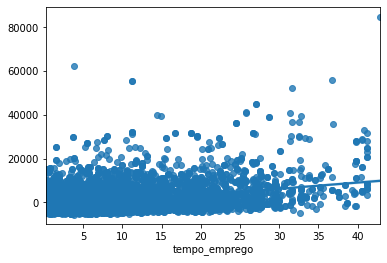

In [71]:
sns.regplot(y = residuos, x = 'tempo_emprego', data = df)